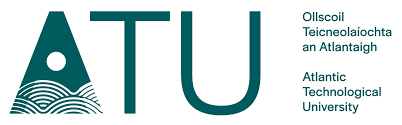

# Programming for Data Analysis Assignment 2022

***

### Eleanor Sammon, Student # G00411277


## Table of Contents

1. [Introduction](#introduction)
2. [Synthetic Data](#synthetic_data)
3. [Variables](#variables)
4. [Coding the Dataset](#dataset)
5. [Investigating the Dataset](#investigating)
6. [Conclusion](#conclusion)
7. [References](#references)


## 1. Introduction  <a class="anchor" id="introduction"></a>

The purpose of this project is to synthesise a dataset using data points from a real life phenomenon. 

Having first outlined the pros and cons of synthetic data, I will then synthesise my own data-set which will model the relationship, if any, between age, sex, social class, education and the tendancy towards cigarette smoking. I will outline each of the variables, code a synthetic set of data points for each variable based on real data and perform analysis on the resulting composite data set. 


## 2. Synthetic Data  <a class="anchor" id="synthetic_data"></a>

Synthetic data is artificially generated data that models real data.  

The main advantages of synthetic data are:
    
- **It is easy to generate and use**  Collecting and collating real-world data can be time consuming and raise privacy and data protection issues. Synthetic data is cleaner and doesn’t have the inaccuracies, duplicates or formatting niggles that often come with real data.

- **Its of superior quality**  Real-world data can be time-consuming to collect and collate, it may be missing values, contain inaccuracies or be biased.  Synthetic data is cheaper, faster, has more accurate patterns, is balanced, unbiased, and high quality.

- **It scales well**  Successfully training a predictive model works best with large scale inputs.

- **It has no security, moral or regulatory conflicts** Even where real-world data exists in sufficient quantities it can often be ring-fenced because of compliance issues. General Data Protection Regulation (GDPR) forbids uses of data that weren't explicitly consented to at the time of collection. 


Disadvantages of synthetic data include:
    
- **Bias** The quality of the synthesised output correlates directly to the quality of the input and where there is bias in the input it will be reflected and potentially amplified in the synthesised data with potential for false insights and poor decision-making. 

- **Ignoring outliers** Synthetic data approximates real-world data, it can never really replicate it entirely and therefore outliers which maybe appear in real-world, organic data could be ignored or overlooked in a synthesised data set.  Such outliers can be significant in themselves.

- **Improper use and application** Even synthetic data has to be founded in fact and there are concerns that the underlying real data, which could be sensitive, may still be identifiable to its source.  A synthesised dataset must be carefully aligned to the original problem to ensure it's fulfilling its purpose.


## 3. Variables <a class="anchor" id="variables"></a>

I know someone recently diagnosed with stage 4 lung cancer so I decided to synthesise a data set looking at whether certain societal factors might influence whether a person is more likely to be a smoker. My variables are age (grouped into brackets), gender, smoker, social class and education. 

Lung cancer is the biggest cancer killer worldwide and is the fourth most common cancer in Ireland after prostate, breast and colorectal with about 2,690 cases diagnosed with lung cancer annually.  The incidence of lung cancer is currently decreasing for men but increasing for women.  The majority of people who get lung cancer are over the age of 50.  Smoking avoidance/cessation is the most important preventative strategy as over 90% of lung cancer can be attributed to cigarette smoke.

### 3.1 Age

The data for smoking statistics I am using is taken from the [Healthy Ireland Survey 2021](https://www.gov.ie/en/publication/9ef45-the-healthy-ireland-survey-2021/).  It looks at smokers in the age range from 15 to 65+ so on this basis I will generate an array of 1000 random ages from the age of 15.  The average [life expectancy](https://www.worlddata.info/europe/ireland/index.php) in Ireland in 2020 was 82.2 years so I used this as the upper parameter of my array.

In [1]:
# import the necessary libraries to run the code and perform analysis
import numpy as np
import pandas as pd 
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt


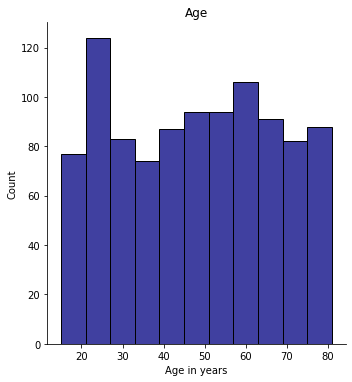

In [2]:
## generate a random array of 1000 ages between 15 and 82
Age = np.random.randint(low=15, high=82, size=1000) 

# plot the distribution
sns.displot(Age, color = 'navy')
plt.title('Age')
plt.xlabel('Age in years')
plt.show()

In [3]:
np.mean(Age)

47.387

Getting the age structure correct for my synthesised database has been one of the greatest challenges.  I tried a variety of solutions to more accurately reflect the demographic of ages 15 to 65+.  I found that until I got this balance correct, the rest of my variables were skewed and didn't correlate accurately.  Having specified an age range starting at age 15, the mean was not reflective of the actual population mean age (37.4). 

I tried concatenating two arrays such that the mean was more approximate to 37.4 but this was also badly skewed and not representative.  Ultimately I took the population figures from the CSO in bands that corresponded with the bands for my Education variable and rather than create an array of individual ages, I created bins which encompassed the relevant age groups, being far more representative and accurate.  Having done so I found that my other variables lined up more accurately. 

<div>
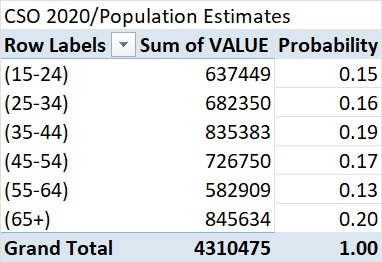
</div>

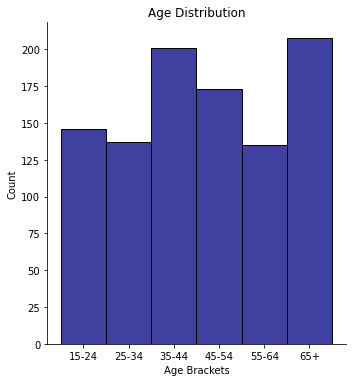

In [4]:
# dataframe for age groups
age_groups = ['15-24', '25-34', '35-44', '45-54', '55-64', '65+'] # Create a list of age bins

#get the correct distribution of ages in the population
agedist = np.random.choice(age_groups, 1000, p=[0.15, 0.16, 0.19, 0.17, 0.13, 0.20]) #draw samples with the percentages used as probabilities
agedist.sort() #show bins in order

sns.displot(agedist, color = 'navy')
plt.title('Age Distribution')
plt.xlabel('Age Brackets')
plt.show()

<div>
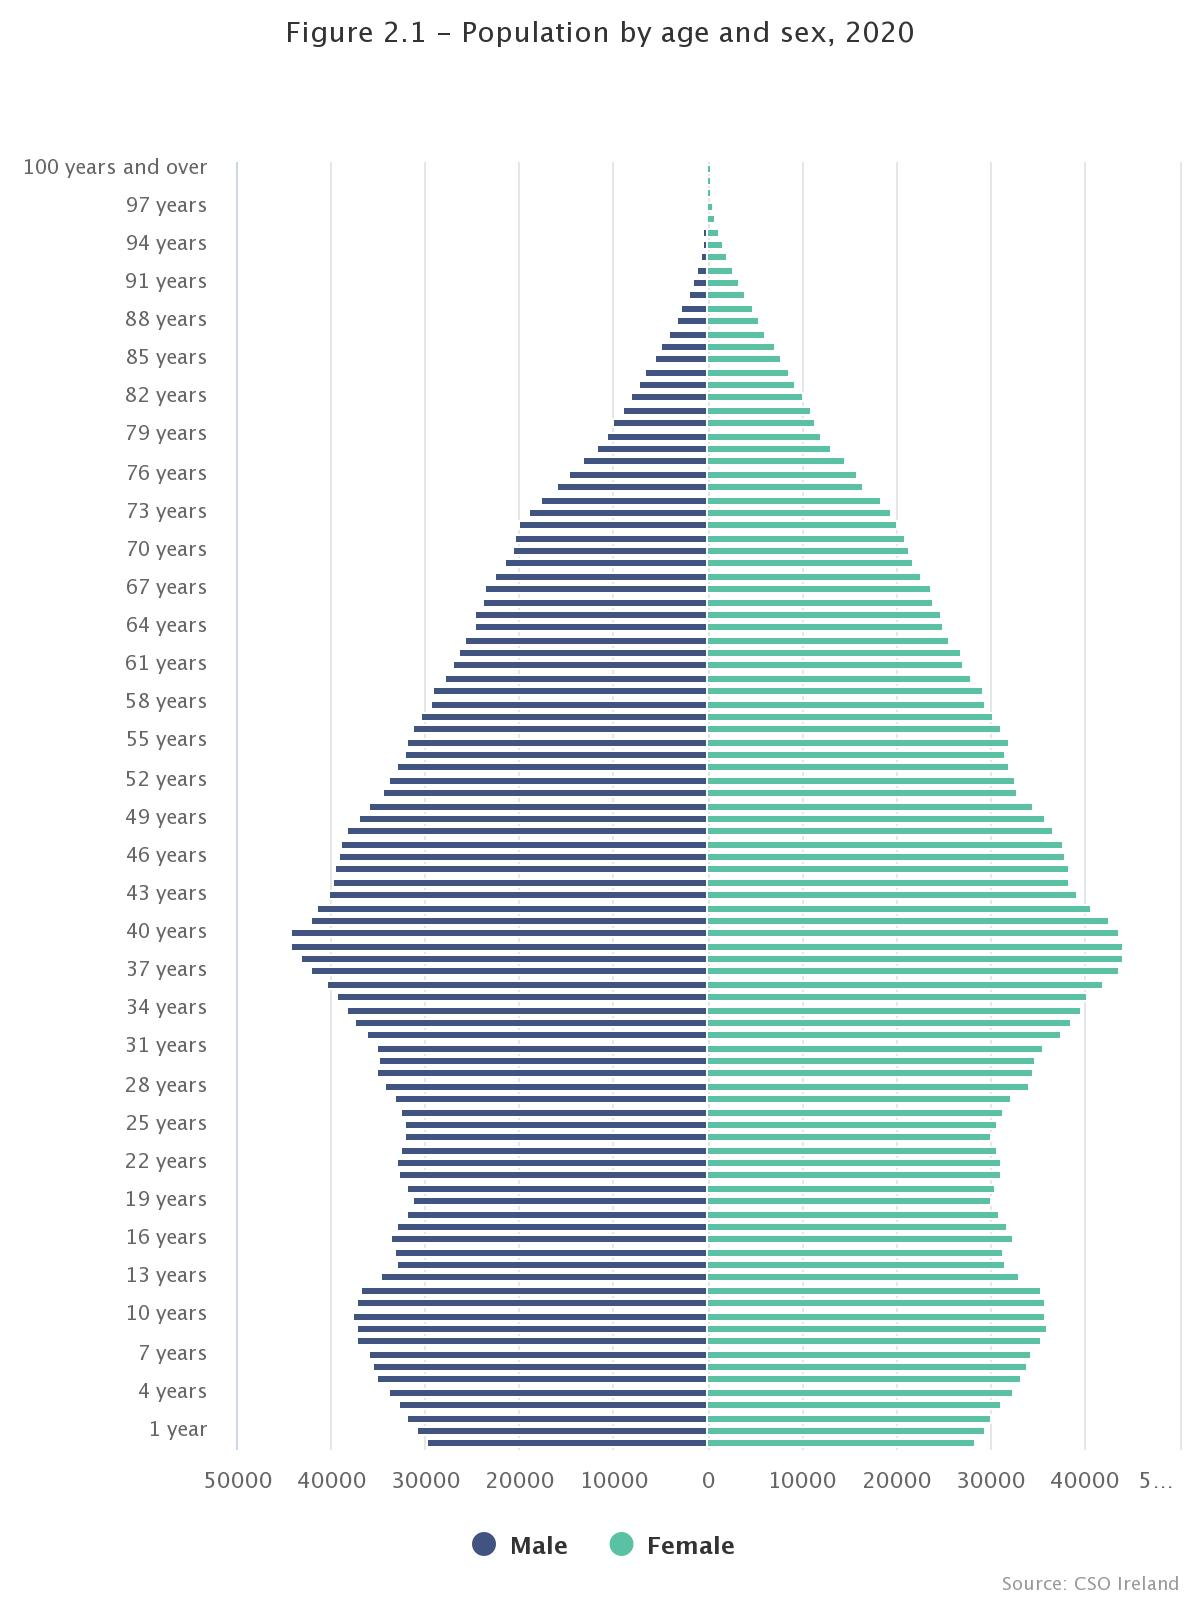
</div>

### 3.2 Gender

According to [World Bank](https://data.worldbank.org/indicator/SP.POP.TOTL.FE.ZS?locations=IE), in 2021 the female to male ratio in Ireland reached almost parity (50.3% female as against 49.7% male) largely owing to migration in recent years. I decided to include the genders as men are more likely to smoke than women and I will include this probability in my analysis of smokers. 

In [5]:
Genders = ['Male', 'Female'] 
np.random.choice(Genders, 1000, p=[0.497, 0.503])

array(['Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male',
       'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male',
       'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female',
       'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male',
       'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', '

### 3.3 Smoking

According to the [Healthy Ireland survey](https://www.gov.ie/en/publication/9ef45-the-healthy-ireland-survey-2021/#), 18% of the Irish population are currently smokers (daily and occasionally).  This represents a reduction of 5% since 2015 when the prevalence of smokers was 23%.  

The World Health Organisation statistics put the % of the global population of smokers at 22.3% (2020) and says 
> _"The economic costs of tobacco use are substantial and include significant health care costs for treating the diseases caused by tobacco use as well as the lost human capital that results from tobacco-attributable morbidity and mortality."_<

The WHO also point to the fact that over 80% of the world's 1.3 billion tobacco users live in low- and middle-income countries.  

Whether someone is a smoker or not is a discrete probability distribution – a binomial distribution – which captures variables with two possible outcomes.  In this instance, the probability is not 50/50 of being a smoker/non-smoker as we know 18% smoke, 82% don't with men in Ireland more likely to smoke than women.  Therefore in my database I have generated random variables with the probability distribution built in according to the proportion of smokers/non-smokers in the population broken down by gender.

### 3.4 Social Class

The Irish population is classified into one of seven social class groups which are ranked on the basis of occupation, thereby bringing together people with similar levels of occupational skill.  According to the [2016 Census of Ireland](https://www.cso.ie/en/media/csoie/newsevents/documents/census2016summaryresultspart2/Chapter_6_Socio-economic_group_and_social_class.pdf), being the most recent complete data set available, the following is the breakdown of the population by social class:

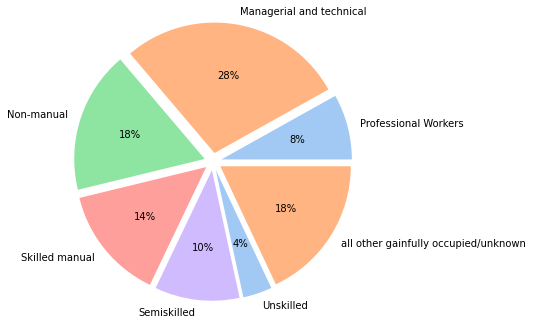

In [6]:
# https://www.educative.io/answers/how-to-explode-a-pie-chart-using-matplotlib-in-python
# % values for each social class category
values = np.array([8.1, 28.1, 17.6, 14.1, 10.5, 3.6, 18])
myexplode = [0.1 ,0.1 ,0.1 ,0.1 ,0.1 ,0.1, 0.1]
mylabels = ['Professional Workers', 'Managerial and technical', 
            'Non-manual', 'Skilled manual', 'Semiskilled', 
            'Unskilled', 'all other gainfully occupied/unknown']
colors = sns.color_palette('pastel')[0:5]

#create pie chart with % values
plt.pie(values, explode=myexplode, labels = mylabels, colors = colors, autopct='%.0f%%', radius = 1.5)
plt.show()

Weighted distributions specify the probabilities of events based on observed and recorded data and for the purposes of this assignment, both social class and education are synthesised using weighted distributions to reflect the data as observed in the real world.  In both instances the underlying data points were drawn from the CSO 2016 Census, being the most recent complete set of data.

### 3.5 Education

The [CSO Website](https://data.cso.ie/table/EA005) has a useful interactive table which gives information about the highest levels of education amongst the Irish population for both 2011 and 2016 Census.  I have used the most recent complete set of data, being the 2016 Census. 

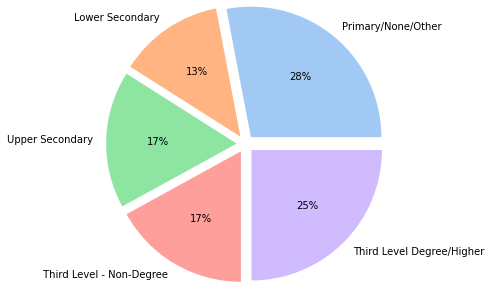

In [7]:
# % values for each education category
education = np.array([28, 13, 17, 17, 25])
cats = ['Primary/None/Other', 'Lower Secondary', 'Upper Secondary',' Third Level - Non-Degree', 'Third Level Degree/Higher']
myexplode = [0.1 ,0.1 ,0.1 ,0.1 ,0.1]
colors = sns.color_palette('pastel')[0:5]

#create pie chart with % values
plt.pie(education, explode=myexplode, labels = cats, colors = colors, autopct='%.0f%%', radius = 1.5)

plt.show()

I will use the following probability table from CSO statistics to calculate the levels of education amongst my synthesised population, allocated by age group.

<div>
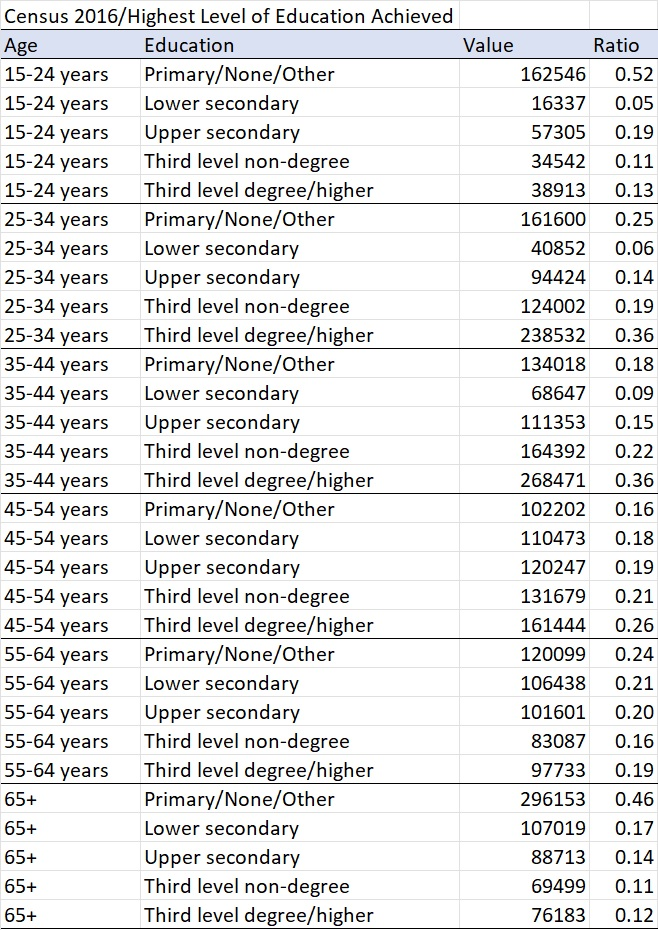
</div>

## 4. Coding the Dataset  <a class="anchor" id="dataset"></a>

In [19]:
# overall dataframe categories pulling together all the code
df = pd.DataFrame(columns=['Age Groups','Genders', 'Smoker', 'Social_Class', 'Education'])

# set the seed, a nod to Douglas Adams and the ASCII code for the symbol *
np.random.seed(42)

# dataframe for age
age_groups = ['15-24', '25-34', '35-44', '45-54', '55-64', '65+'] # Create a list of age bins

#get the correct distribution of ages in the population
agedist = np.random.choice(age_groups, 1000, p=[0.15, 0.16, 0.19, 0.17, 0.13, 0.20]) #draw samples with the percentages used as probabilities
agedist.sort() #ensure bins do not show in random order

df['Age Groups'] = agedist

# dataframe for male/female split
Genders = ['Male', 'Female'] 
df['Genders'] = np.random.choice(Genders, 1000, p=[0.497, 0.503])

# dataframe for smokers
smokers = ['Yes', 'No']  #Create the smoker/ non-smoker

# function to assign smoker based on gender probabilities
def smoker_gender(smoke):
    if smoke == 'Male':
        return np.random.choice(smokers, p=[0.20, 0.80])
    if smoke == 'Female':
        return np.random.choice(smokers, p=[0.17, 0.83])
    
df['Smoker'] = df['Genders'].apply(smoker_gender)

# dataframe for social class
classes = ['Professional_Workers', 'Managerial_Technical', 'Non_Manual', 'Skilled_Manual', 'Semiskilled', 'Unskilled', 'Other']
df['Social_Class'] = np.random.choice(classes, size=1000, p=[0.081, 0.281, 0.176, 0.141, 0.105, 0.036, 0.180], replace=True)


# dataframe for education
education = ['Primary/None/Other', 'Lower Secondary', 'Upper Secondary', 'Third Level - Non-Degree', 'Third Level Degree/Higher']


def levels(age):
    if age == '15-24':
        return np.random.choice(education, p=[0.52, 0.05, 0.19, 0.11, 0.13])
    if age == '25-34':
        return np.random.choice(education, p=[0.25, 0.06, 0.14, 0.19, 0.36])
    if age == '35-44':
        return np.random.choice(education, p=[0.18, 0.09, 0.15, 0.22, 0.36])
    if age == '45-54':
        return np.random.choice(education, p=[0.16, 0.18, 0.19, 0.21, 0.26])
    if age == '55-64':
        return np.random.choice(education, p=[0.24, 0.21, 0.2, 0.16, 0.19])
    if age == '65+':
        return np.random.choice(education, p=[0.46, 0.17, 0.14, 0.11, 0.12])
    
df['Education'] = df['Age Groups'].apply(levels)

df

,Age Groups,Genders,Smoker,Social_Class,Education
0,15-24,Male,No,Skilled_Manual,Upper Secondary
1,15-24,Female,No,Unskilled,Third Level - Non-Degree
2,15-24,Female,No,Managerial_Technical,Third Level - Non-Degree
3,15-24,Female,No,Skilled_Manual,Primary/None/Other
4,15-24,Female,No,Skilled_Manual,Primary/None/Other
...,...,...,...,...,...
995,65+,Female,No,Non_Manual,Third Level Degree/Higher
996,65+,Female,Yes,Managerial_Technical,Primary/None/Other
997,65+,Male,No,Non_Manual,Primary/None/Other
998,65+,Male,No,Non_Manual,Third Level - Non-Degree


## 5. Investigating the Dataset  <a class="anchor" id="investigating"></a>

Now that my dataframe is synthesised, I want to do some routine analysis of it to make sure that it looks and performs as expected with all the rows, columns and data types intended.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age Groups    1000 non-null   object
 1   Genders       1000 non-null   object
 2   Smoker        1000 non-null   object
 3   Social_Class  1000 non-null   object
 4   Education     1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


I check that the proportion of smokers approximates the expected 82%/18% split.

In [10]:
df['Smoker'].value_counts()

No     817
Yes    183
Name: Smoker, dtype: int64

I use value counts to check that all my categories for social class and education have been covered and in the expected proportions.

In [11]:
df['Social_Class'].value_counts()

Managerial_Technical    288
Other                   172
Non_Manual              167
Skilled_Manual          158
Semiskilled              92
Professional_Workers     88
Unskilled                35
Name: Social_Class, dtype: int64

In [12]:
df['Education'].value_counts()

Primary/None/Other           305
Third Level Degree/Higher    227
Upper Secondary              169
Third Level - Non-Degree     167
Lower Secondary              132
Name: Education, dtype: int64

The `groupby` function provides a useful summary of two of my variables against each other, being smoker and social class. 

In [13]:
df.groupby(['Smoker', 'Social_Class']).size()

Smoker  Social_Class        
No      Managerial_Technical    236
        Non_Manual              132
        Other                   137
        Professional_Workers     79
        Semiskilled              80
        Skilled_Manual          122
        Unskilled                31
Yes     Managerial_Technical     52
        Non_Manual               35
        Other                    35
        Professional_Workers      9
        Semiskilled              12
        Skilled_Manual           36
        Unskilled                 4
dtype: int64

The plot below shows that the group whose highest level of education is 'Primary/None/Other' have the highest incidence of smoking.  They also have the highest incidence of not smoking!  

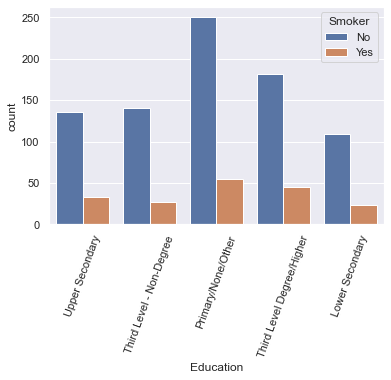

In [25]:
sns.set(style = 'darkgrid')
sns.countplot(x = 'Education', hue = 'Smoker', data=df)
plt.xticks(rotation='70')
plt.show()



## 6. Conclusion  <a class="anchor" id="conclusion"></a>

## 7. References  <a class="anchor" id="references"></a>

https://datagen.tech/guides/synthetic-data/synthetic-data/ - visited on 07/11/2022

video : https://www.youtube.com/watch?v=uG_YMEcyaA8 – watched 07/11/2022

Advantages and disadvantages of synthetic data - https://www.dataversity.net/the-pros-and-cons-of-synthetic-data/ - visited 09/11/2022

https://www.hse.ie/eng/about/who/tobaccocontrol/research/smoking-in-ireland-2021.pdf - visited 09/11/2022

https://www.cso.ie/en/media/csoie/newsevents/documents/census2016summaryresultspart2/Chapter_6_Socio-economic_group_and_social_class.pdf visited 15/11/2022

Numpy user guide - https://numpy.org/doc/stable/user/ - visited 16/11/2022

Assigning age bins - https://stackoverflow.com/questions/71564603/pandas-cut-and-specifying-specific-bin-sizes - visited 17/11/2022

Pandas: analysing dataframes - https://www.w3schools.com/python/pandas/pandas_analyzing.asp - visited 18/11/2022

Lung cancer information and statistics - https://www.mariekeating.ie/cancer-information/lung-cancer/ - visited 18/11/2022

The Association Between Education and Smoking Prevalence, Independent of Occupation: A Nationally Representative Survey in Japan - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7025916/#:~:text=With%20respect%20to%20the%20association,current%20smoking%20in%20those%20individuals. - visited 18/11/2022


Github Repositories used for reference:

https://github.com/Sarahkel/Programming_Project_2018-Synthesising-an-IQ-dataset-with-Python/blob/master/Synthesising%20a%20dataset%20on%20IQ%20using%20Python.ipynb

https://github.com/NiamhOL/Programming-for-Data-Analysis-Project-2019/blob/master/Programming%20for%20Data%20Analysis%202019%20Project.ipynb

https://github.com/daithimarkham/Programming-for-Data-Analysis-Project-2019